In [1]:
%matplotlib inline

In [12]:
import matplotlib;
matplotlib.use("pdf");

import matplotlib.pyplot as plt;
import matplotlib.gridspec as gridspec
import matplotlib.font_manager
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.style.use('ggplot')
import matplotlib.backends.backend_pdf as pdf;
import matplotlib.gridspec as gs;
import numpy as np
import pylab as P
import scipy.stats as stats
import pandas as pd
import seaborn as sns
# sns.set()

/home/gergely/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/gergely/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/gergely/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/gergely/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/gergely/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/gergely/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py"

### CORT Data -- Two-photon data

In [3]:
# two-photon data
data = pd.read_csv('/data/gergely/invivo_DATA/structural/Summary/SummaryData.csv')

In [4]:
data.head()

,segment,spine/micron,condition
0,gts2_a1_R3_s1,0.428151,bsline
1,gts2_a1_R3_s2,0.305755,bsline
2,gts2_a1_R3_s3,0.275387,bsline
3,gts2_a1_R2_s1,0.429594,bsline
4,gts2_a1_R2_s2,0.265487,bsline


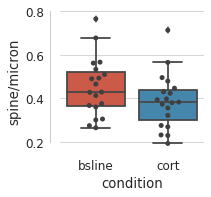

In [5]:
# Plot Seaborn style
plt.figure(figsize=[2, 2])
sns.set_context("paper",font_scale=1.5, rc={"lines.linewidth": 1.8})
sns.set_style("whitegrid")
ax1 = sns.boxplot(x="condition", y="spine/micron", data=data)
ax1 = sns.swarmplot(x="condition", y="spine/micron", data=data, color=".25")
plt.yticks([0.2,0.4,0.6,0.8])
sns.despine(bottom=True, offset=10, trim=True)
plt.gca().set_position([0, 0, 1, 1])
plt.savefig("cortGraph3.pdf", dpi=300, format="pdf")
# ax1 = sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data,
#                     color=".25")

# Issue: this is still raster and not vectorgraphic

Current size: [2.0, 1.0]


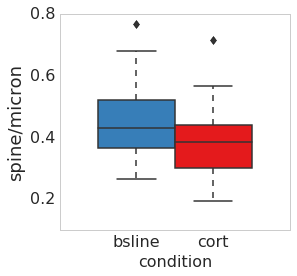

In [50]:
# Create boxplot - matplotlib style


# fig_size[0] = 2
# fig_size[1] = 1
# plt.rcParams["figure.figsize"] = fig_size
# # fig_size = plt.rcParams["figure.figsize"]

fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size


bplot = data.boxplot(by="condition", column="spine/micron", positions=[1,1.5],widths=0.5, 
                     return_type='dict', figsize=(4,4), grid=False, patch_artist=True, 
                     sym='d', fontsize=16)

# Style boxplot
colors = ['#377eb8', '#e41a1c']
for patch, color in zip(bplot['spine/micron']['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('0.2')
    patch.set_linewidth(1.5)
for whisker in bplot['spine/micron']['whiskers']:
    whisker.set_color('0.2')
    whisker.set_linewidth(1.5)
for fliers in bplot['spine/micron']['fliers']:
    fliers.set_markerfacecolor('0.2')
for median in bplot['spine/micron']['medians']:
    median.set_color('0.2')
    median.set_linewidth(1.5)
for caps in bplot['spine/micron']['caps']:
    caps.set_color('0.2')
    caps.set_linewidth(1.5)

# Other adjustments
plt.title("")
plt.suptitle("")
plt.xlabel("condition", fontsize=16, fontname="Arial")
plt.ylabel("spine/micron", fontsize=18, fontname="Arial")
plt.yticks([0.2,0.4,0.6,0.8])
plt.style.use('ggplot')


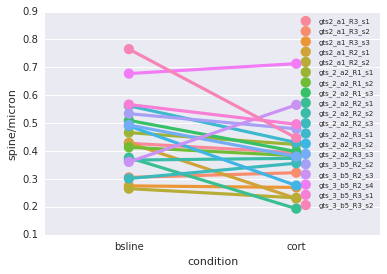

In [90]:
fig, ax = plt.subplots()
sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data)
leg = ax.legend(loc='upper right', fontsize='xx-small')

ValueError: num must be 1 <= num <= 1, not 2

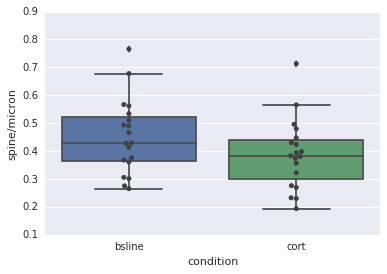

In [88]:
pages = pdf.PdfPages("/data/gergely/Summaries/_structural/gts2_3cohorts_interimSum.pdf")
plt.subplot(111)
ax1 = sns.boxplot(x="condition", y="spine/micron", data=data)
ax1 = sns.swarmplot(x="condition", y="spine/micron", data=data, color=".25")
plt.subplot(112)
sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data)
# leg = ax.legend(loc='upper right', fontsize='xx-small')



# figure(figsize=(4,5))
# ax = fig.add_subplot(111)
# sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data)
# leg = ax.legend(loc='upper right', fontsize='xx-small')
# ax = fig.add_subplot(112)
# ax1 = sns.boxplot(x="condition", y="spine/micron", data=data)
# ax1 = sns.swarmplot(x="condition", y="spine/micron", data=data, color=".25")
pages.close()

### Control Data

In [91]:
data = pd.read_csv('/data/gergely/invivo_DATA/structural/Summary/SummaryDataCtrl.csv')

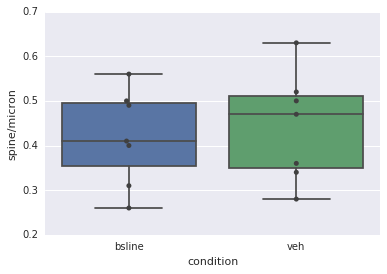

In [92]:
ax1 = sns.boxplot(x="condition", y="spine/micron", data=data)
ax1 = sns.swarmplot(x="condition", y="spine/micron", data=data, color=".25")

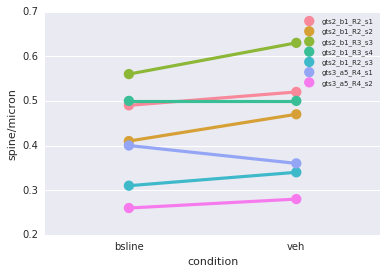

In [93]:
fig, ax = plt.subplots()
sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data)
leg = ax.legend(loc='upper right', fontsize='xx-small')

### Confocal Data

## Spine density

In [6]:
densityData = pd.read_csv('/data/gergely/Summaries/_structural/RK_spine_count_DATA_CSV.csv', skip_blank_lines=False)

In [7]:
print(densityData)
densityData.describe()

    gts5_6  gts5_5  gts5_1
0     3.24    2.86    4.75
1     3.83    3.48    3.78
2     3.67    6.84    3.90
3     1.91    2.45    2.19
4     2.85    3.84    5.02
5     4.97    3.04    3.53
6     2.69    2.86    3.96
7     2.98    3.38    3.14
8     2.73    3.76    3.33
9     4.64     NaN     NaN
10    4.59     NaN     NaN
11    3.26     NaN     NaN
12    3.00     NaN     NaN


,gts5_6,gts5_5,gts5_1
count,13.000000,9.000000,9.000000
mean,3.412308,3.612222,3.733333
std,0.891237,1.292940,0.844719
min,1.910000,2.450000,2.190000
25%,2.850000,2.860000,3.330000
50%,3.240000,3.380000,3.780000
75%,3.830000,3.760000,3.960000
max,4.970000,6.840000,5.020000


In [8]:
gts5_6dens = pd.Series(densityData['gts5_6']).dropna()
gts5_5dens = pd.Series(densityData['gts5_5']).dropna()
gts5_1dens = pd.Series(densityData['gts5_1']).dropna()

In [9]:
print(len(gts5_6dens))
print(len(gts5_5dens))
print(len(gts5_1dens))

13
9
9


In [10]:
# one way Anova
stats.f_oneway(gts5_6dens, gts5_5dens, gts5_1dens)

F_onewayResult(statistic=0.28286307228294855, pvalue=0.7557509151504369)

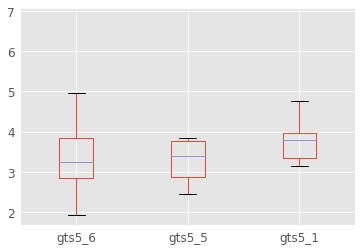

In [29]:
ax = densityData.boxplot()

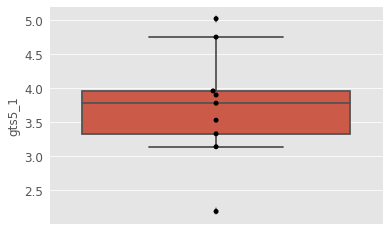

In [44]:
sns.boxplot(y=gts5_1dens)
sns.swarmplot(y=gts5_1dens, color='k')

(1.5, 5.5)

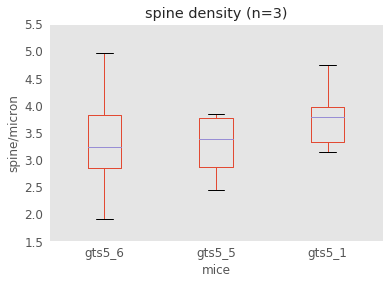

In [45]:
fig, ax = plt.subplots()
# boxprops = dict(linestyle='-', linewidth=3, color='black')
densityData.boxplot(ax=ax)
ax.grid(False)
ax.legend(loc='right')
ax.set_title('spine density (n=3)')
ax.set_xlabel('mice')
ax.set_ylabel('spine/micron')
ax.set_ylim([1.5, 5.5])

(1.5, 5.5)

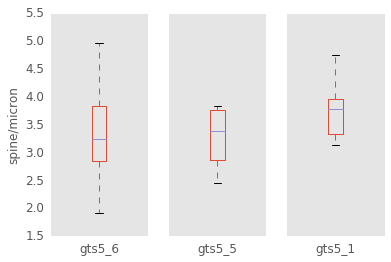

In [376]:
# gts5_6dens = pd.Series(densityData['gts5_6']).dropna()
# gts5_5dens = pd.Series(densityData['gts5_5']).dropna()
# gts5_1dens = pd.Series(densityData['gts5_1']).dropna()
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
gts5_6dens.plot.box(ax=ax1)
gts5_5dens.plot.box(ax=ax2)
gts5_1dens.plot.box(ax=ax3)

fig.set_label('spine density (n=3)')
ax1.grid(False)
ax1.legend(loc='right')
ax1.set_ylabel('spine/micron')
ax1.set_ylim([1.5, 5.5])

ax2.grid(False)
ax2.legend(loc='right')
ax2.set_yticks([])
ax2.set_ylim([1.5, 5.5])

ax3.grid(False)
ax3.legend(loc='right')
ax3.set_yticks([])
ax3.set_ylim([1.5, 5.5])

# print(gts5_6, gts5_1, gts5_5) 


## Volume data

In [46]:
volumeData = pd.read_csv('/data/gergely/Summaries/_structural/RK_spine_volume_DATA_UTF.csv', skip_blank_lines=False)

(0, 0.2)

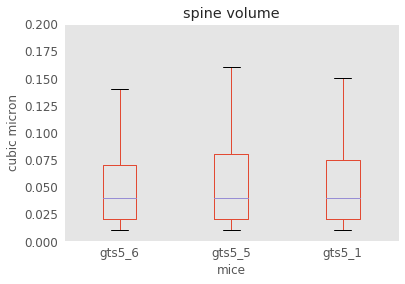

In [47]:
fig, ax = plt.subplots()
# boxprops = dict(linestyle='-', linewidth=3, color='black')
volumeData.boxplot(ax=ax)
ax.grid(False)
ax.legend(loc='right')
ax.set_title('spine volume')
ax.set_xlabel('mice')
ax.set_ylabel('cubic micron')
ax.set_ylim([0, 0.2])

In [ ]:
sns.boxplot(y=gts5_1dens)
sns.swarmplot(y=gts5_1dens, color='k')

In [79]:
gts5_6vol = pd.Series(volumeData['gts5_6']).dropna()
gts5_5vol = pd.Series(volumeData['gts5_5']).dropna()
gts5_1vol = pd.Series(volumeData['gts5_1']).dropna()
print(len(gts5_6vol))
print(len(gts5_5vol))
print(len(gts5_1vol))

1467
1311
1271


In [217]:
volumeData.head()

,gts5_6,gts5_5,gts5_1
0,0.01,0.92,1.13
1,0.01,0.74,0.85
2,0.01,0.68,0.82
3,0.01,0.62,0.73
4,0.01,0.61,0.70


In [379]:
volumeData.describe()

,gts5_6,gts5_5,gts5_1
count,1467.000000,1311.000000,1271.000000
mean,0.058971,0.065835,0.063541
std,0.068258,0.079977,0.085385
min,0.010000,0.010000,0.010000
25%,0.020000,0.020000,0.020000
50%,0.040000,0.040000,0.040000
75%,0.070000,0.080000,0.075000
max,0.530000,0.920000,1.130000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0b012cb10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe0af5aff90>]], dtype=object)

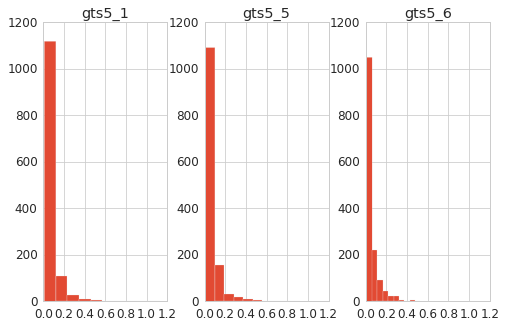

In [226]:
# fig, ax = 
volumeData.hist(layout=(1,3), figsize=(8,5), bins=10, sharex=True)

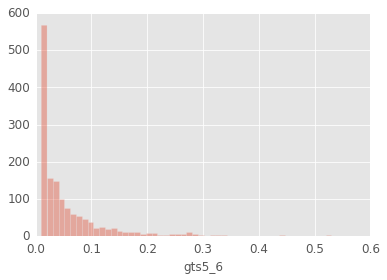

In [381]:
sns.distplot(gts5_6vol, kde=False, rug=False);

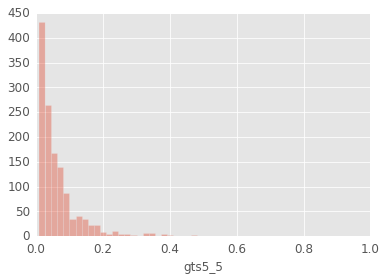

In [382]:
sns.distplot(gts5_5vol, kde=False, rug=False);

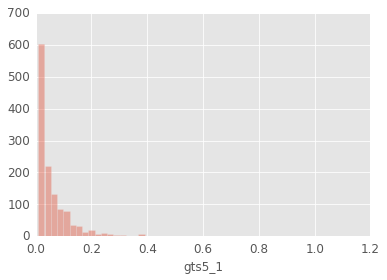

In [383]:
sns.distplot(gts5_1vol, kde=False, rug=False);

In [150]:
violonData6 = pd.read_csv('/data/gergely/Summaries/_structural/gts5_6.csv', skip_blank_lines=False)
violonData5 = pd.read_csv('/data/gergely/Summaries/_structural/gts5_5.csv', skip_blank_lines=False)
violonData1 = pd.read_csv('/data/gergely/Summaries/_structural/gts5_1.csv', skip_blank_lines=False)

In [151]:
frames = [violonData6, violonData5, violonData1]
stackedviolin = pd.concat(frames, axis=0, ignore_index=True)

In [152]:
data = stackedviolin.dropna()
data.head()

,volume,treatment
0,0.01,ctrl
1,0.01,ctrl
2,0.01,ctrl
3,0.01,ctrl
4,0.01,ctrl


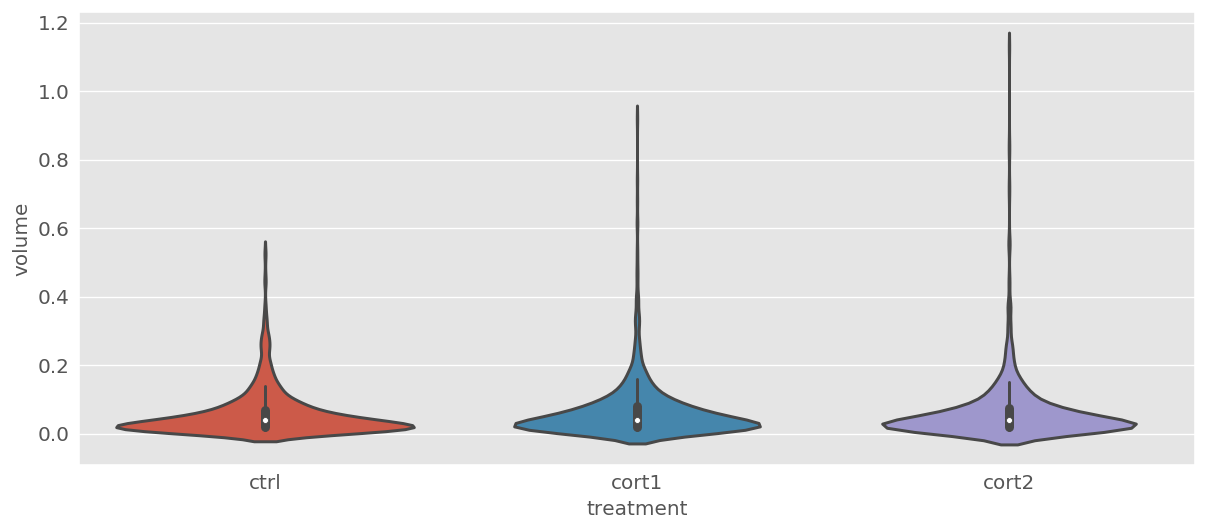

In [157]:
# fig = plt.figure(figsize=[12,5], dpi=120)
fig, ax = plt.subplots(figsize=[12,5], dpi=120)
ax = sns.violinplot(y=data['volume'], x=data['treatment'])
fig.savefig('/data/gergely/Summaries/_structural/spine_volume_violin.svg', dpi=120)

(-0.048195144808857296, 0.4)

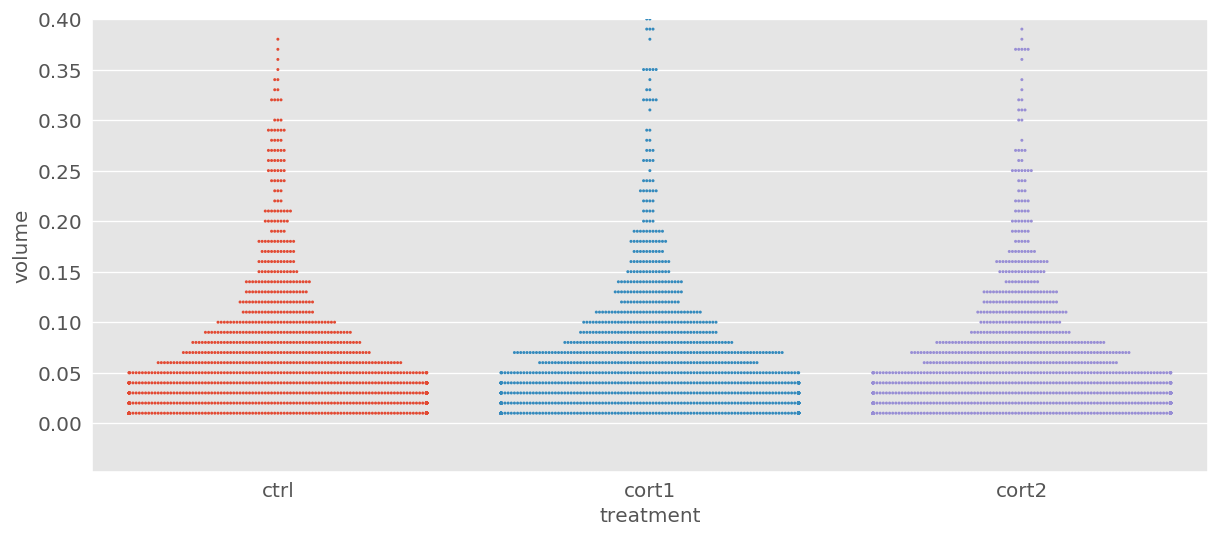

In [208]:
fig, ax = plt.subplots(figsize=[12,5], dpi=120)
ax = sns.swarmplot(y=data['volume'], x=data['treatment'], size=1.8)
ax.set_ylim(ymax=0.4)

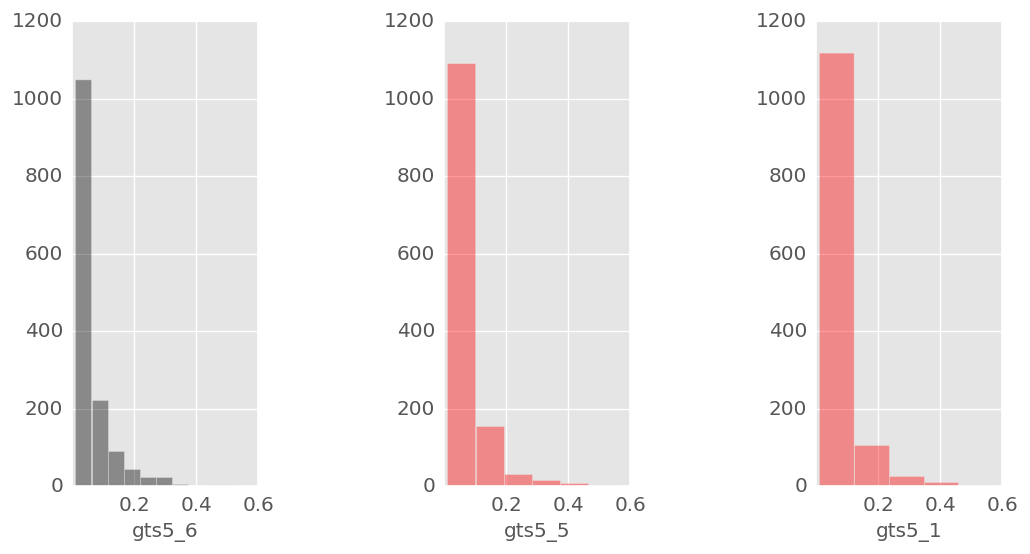

In [397]:
# Plot Seaborn style
# plt.figure(figsize=[2, 2])
# sns.set_context("paper",font_scale=1.5, rc={"lines.linewidth": 1.8})
# sns.set_style("whitegrid")
fig = plt.figure(figsize=[10,5], dpi=120)
spec = gridspec.GridSpec(ncols=3, nrows=1, wspace=1)

ax1 = fig.add_subplot(spec[0, 0])
plt.ylim(ymax=1200)
plt.xlim(xmax=0.6)
plt.xticks([0.2,0.4,0.6])
ax1 = sns.distplot(gts5_6vol, color='k', bins=10, kde=False)

ax2 = fig.add_subplot(spec[0, 1])
plt.ylim(ymax=1200)
# plt.yticks([])
plt.xlim(xmax=0.6)
plt.xticks([0.2,0.4,0.6])
ax2 = sns.distplot(gts5_5vol, color='r', bins=10, kde=False, rug=False)

ax3 = fig.add_subplot(spec[0, 2])
plt.ylim(ymax=1200)
plt.xlim(xmax=0.6)
plt.xticks([0.2,0.4,0.6])
ax3 = sns.distplot(gts5_1vol, color='r', bins=10, kde=False, rug=False);
# plt.yticks([0.2,0.4,0.6,0.8])
# sns.despine(bottom=True, offset=10, trim=True)
# plt.gca().set_position([0, 0, 1, 1])
# plt.savefig("cortGraph3.pdf", dpi=300, format="pdf")
# ax1 = sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data,
#                     color=".25")

# Issue: this is still raster and not vectorgraphic

Text(0.5,0,'ctrl vs. cort2')

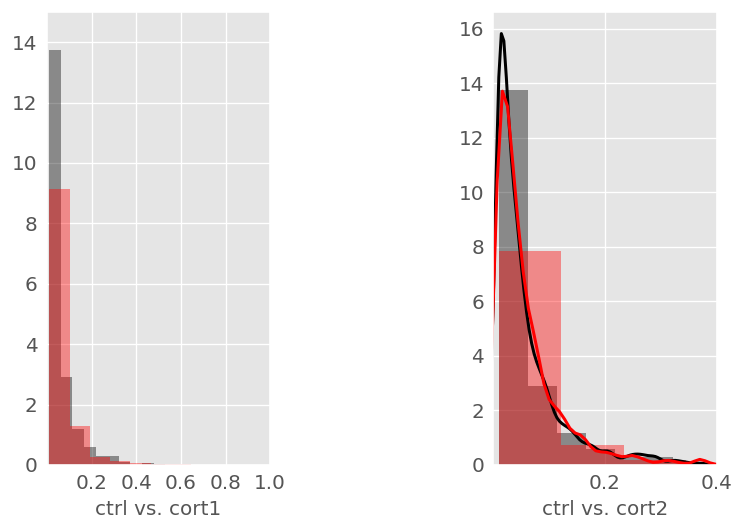

In [192]:
# Plot Seaborn style
# plt.figure(figsize=[2, 2])
# sns.set_context("paper",font_scale=1.5, rc={"lines.linewidth": 1.8})
# sns.set_style("whitegrid")
fig = plt.figure(figsize=[12,5], dpi=120)
# spec = gridspec.GridSpec(ncols=3, nrows=1, wspace=1)
ax1 = fig.add_subplot(spec[0, 0])
plt.ylim(ymax=15)
plt.xlim(xmax=1)
plt.xticks([0.2,0.4,0.6,0.8,1])
ax1 = sns.distplot(gts5_6vol, color='k', bins=10, rug=False, kde=False, norm_hist=True);
# plot KDE with this: kde_kws={"color": "k", "lw":1, "alpha":.8, "kernel":"gau", "bw":.01 },
ax1 = sns.distplot(gts5_5vol, color='r', bins=10, rug=False, kde=False, norm_hist=True)
ax1.set_xlabel('ctrl vs. cort1') #ctrl = gts5_6 cort1 = gts5_5

ax2 = fig.add_subplot(spec[0, 1])
plt.ylim(ymax=15)
# plt.yticks([])
plt.xlim(xmax=0.4)
plt.xticks([0.2,0.4])
sns.distplot(gts5_6vol, color='k', bins=10, rug=False, norm_hist=True);
sns.distplot(gts5_1vol, color='r', bins=10, rug=False, norm_hist=True)
ax2.set_xlabel('ctrl vs. cort2') #ctrl = gts5_6 cort1 = gts5_1

# ax3 = fig.add_subplot(spec[0, 2])
# plt.ylim(ymax=200)
# plt.xlim(xmax=1.2)
# plt.xticks([0.2,0.4,0.6])
# ax3 = sns.distplot(gts5_6, color='b', bins=10, kde=False, rug=False);
# plt.yticks([0.2,0.4,0.6,0.8])
# sns.despine(bottom=True, offset=10, trim=True)
# plt.gca().set_position([0, 0, 1, 1])
# plt.savefig("cortGraph3.pdf", dpi=300, format="pdf")
# ax1 = sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data,
#                     color=".25")

# Issue: this is still raster and not vectorgraphic

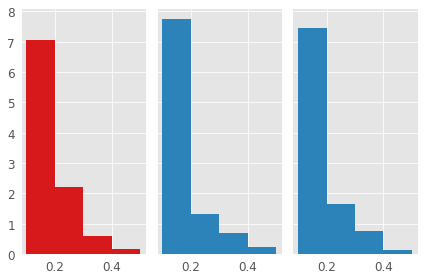

In [204]:
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
bins=[0.1,0.2,0.3,0.4,0.5]
axs[0].hist(gts5_6vol, bins=bins, density=True, color='#d7191c')
axs[1].hist(gts5_5vol, bins=bins, density=True, color='#2b83ba')
axs[2].hist(gts5_1vol, bins=bins, density=True, color='#2b83ba')
fig.savefig('/data/gergely/Summaries/_structural/vol_distrib_norm.svg', dpi=120)

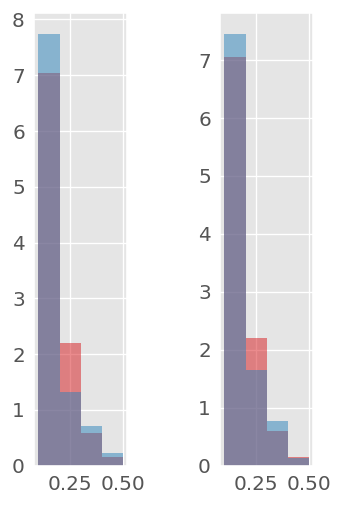

In [233]:
fig = plt.figure(figsize=[5,5], dpi=120, tight_layout=True)
# spec = gridspec.GridSpec(ncols=3, nrows=1, wspace=1)
ax1 = fig.add_subplot(spec[0, 0])
bins=[0.1,0.2,0.3,0.4,0.5]
ax1 = plt.hist(gts5_6vol, bins=bins, density=True, color='#d7191c', alpha=0.5)
ax1= plt.hist(gts5_5vol, bins=bins, density=True, alpha=0.5, color='#2b83ba')

ax2 = fig.add_subplot(spec[0, 1])
ax1 = plt.hist(gts5_6vol, bins=bins, density=True, color='#d7191c', alpha=0.5)
ax1= plt.hist(gts5_1vol, bins=bins, density=True, alpha=0.5, color='#2b83ba')
# fig.savefig('/data/gergely/Summaries/_structural/vol_distrib_norm2_step.svg', dpi=120)

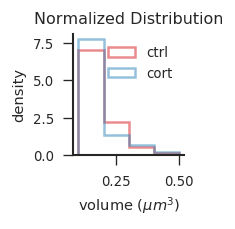

In [276]:
# figure for depression pilot grant
sns.set_context(context='paper', font_scale=1)
sns.set_style(style='ticks')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
fig_dep = plt.figure(figsize=[2,2], dpi=120, tight_layout=True)
bins=[0.1,0.2,0.3,0.4,0.5]
ax1 = plt.hist(gts5_6vol, bins=bins, density=True, color='#d7191c', alpha=0.5, histtype='step', linewidth=1.5)
ax1= plt.hist(gts5_5vol, bins=bins, density=True, alpha=0.5, color='#2b83ba', histtype='step', linewidth=1.5)
ax1 = plt.legend(['ctrl', 'cort'])
plt.ylabel('density')
plt.xlabel('volume ($\mu m^3$)')
plt.title('Normalized Distribution')
sns.despine()

fig_dep.savefig('/data/gergely/Summaries/_structural/vol_distrib_pilot_grant_step.svg', dpi=120)

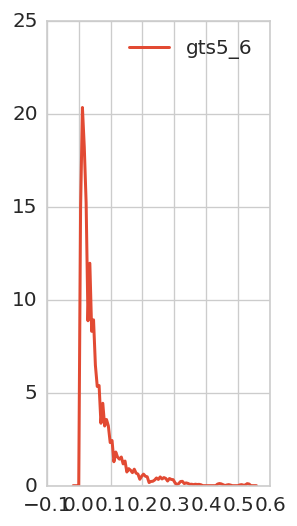

In [291]:
# Plot Seaborn style
# plt.figure(figsize=[2, 2])
# sns.set_context("paper",font_scale=1.5, rc={"lines.linewidth": 1.8})
# sns.set_style("whitegrid")
fig = plt.figure(figsize=[12,5], dpi=120)
# spec = gridspec.GridSpec(ncols=3, nrows=1, wspace=1)

ax1 = fig.add_subplot(spec[0, 0])
# plt.ylim(ymax=50)
# plt.xlim(xmax=0.4)
# plt.xticks([0.2,0.4])

ax1 = sns.kdeplot(gts5_6, kernel='epa');
# ax1 = sns.distplot(gts5_6, color='k', bins=50, kde=False, rug=False, norm_hist=True, label=('ctrl'))
# # ax1 = sns.distplot(gts5_1s, color='r', bins=10, kde=False)
# sns.distplot(gts5_5s, color='r', bins=50, kde=True, rug=False, norm_hist=True)
# # ax3 = sns.distplot(gts5_6, color='k', bins=10, kde=False, rug=False);
# ax1.set_xlabel('gts6_6(ctrl) vs. gts5_5')

# ax2 = fig.add_subplot(spec[0, 1])
# plt.ylim(ymax=50)
# # plt.yticks([])
# plt.xlim(xmax=0.4)
# plt.xticks([0.2,0.4])
# sns.distplot(gts5_6, color='k', bins=50, kde=True, rug=False, norm_hist=True);
# sns.distplot(gts5_1s, color='r', bins=50, kde=True, rug=False, norm_hist=True)
# ax2.set_xlabel('gts6_6(ctrl) vs. gts5_1')

# ax3 = fig.add_subplot(spec[0, 2])
# plt.ylim(ymax=200)
# plt.xlim(xmax=1.2)
# plt.xticks([0.2,0.4,0.6])
# ax3 = sns.distplot(gts5_6, color='b', bins=10, kde=False, rug=False);
# plt.yticks([0.2,0.4,0.6,0.8])
# sns.despine(bottom=True, offset=10, trim=True)
# plt.gca().set_position([0, 0, 1, 1])
# plt.savefig("cortGraph3.pdf", dpi=300, format="pdf")
# ax1 = sns.pointplot(x="condition", y="spine/micron",hue="segment", data=data,
#                     color=".25")

# Issue: this is still raster and not vectorgraphic

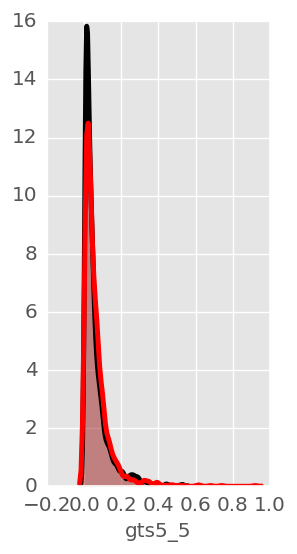

In [404]:
fig = plt.figure(figsize=[12,5], dpi=120)
ax = fig.add_subplot(spec[0, 0])
sns.distplot(gts5_6vol, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color':'k'})
sns.distplot(gts5_5vol, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3, 'color':'r'})


In [87]:
gts5_1s.describe()

count    1271.000000
mean        0.063541
std         0.085385
min         0.010000
25%         0.020000
50%         0.040000
75%         0.075000
max         1.130000
Name: gts5_1, dtype: float64

In [67]:
volumeDataMerged = pd.read_csv('/data/gergely/Summaries/_structural/RK_spine_volume_DATA_merged.csv')

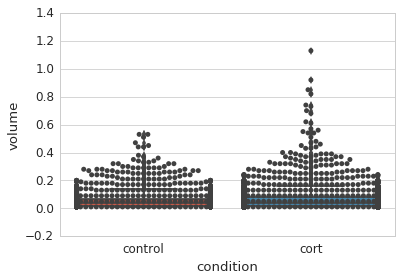

In [82]:
ax1 = sns.boxplot(x="condition", y="volume", data=volumeDataMerged)
ax1 = sns.swarmplot(x="condition", y="volume", data=volumeDataMerged, color=".25")

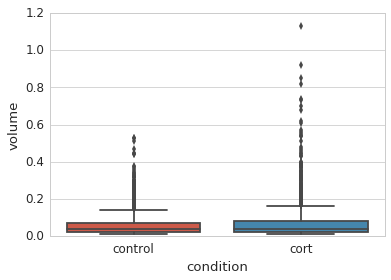

In [83]:
ax1 = sns.boxplot(x="condition", y="volume", data=volumeDataMerged)
# ax1 = sns.swarmplot(x="condition", y="volume", data=volumeDataMerged, color=".25")

KeyboardInterrupt: 

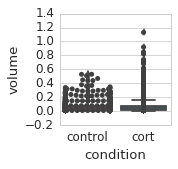

In [78]:
# Plot Seaborn style
plt.figure(figsize=[2, 2])
sns.set_context("paper",font_scale=1.5, rc={"lines.linewidth": 1.8})
sns.set_style("whitegrid")
ax1 = sns.boxplot(x="condition", y="volume", data=volumeDataMerged)
# ax1 = sns.swarmplot(x="condition", y="volume", data=volumeDataMerged, color=".25")
# plt.yticks([0.2,0.4,0.6,0.8])
sns.despine(bottom=True, offset=10, trim=True)
# plt.gca().set_position([0, 0, 1, 1])